# Geothermal Datathon 2021
---

<img src="../figures/the_roaring_kitties_logo.png" width="600" align="center">

Team members:
- **Ricardo Lara**
- **Artur Davletshin**
- **Aigul Akberova**
- **Sercan Gul**
- **Hakki Aydin**
- **Jose Hernandez**
- **Honggeun Jo**

---

### Import Modules

In [4]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
DVp = pd.read_csv('data/DV_predictions.csv')
EBp = pd.read_csv('data/EB_predictions.csv')

DVm = pd.read_csv('data/Duvernay_merged.csv')
EBm = pd.read_csv('data/Eaglebine_merged.csv')

DVmisc = pd.read_csv('data/Duvernay Misc.csv')
EBmisc = pd.read_csv('data/Eaglebine Misc.csv')

In [6]:
DVmisc

,UWI,SurfaceLatitude_NAD27,SurfaceLongitude_NAD27,BottomLatitude_NAD27,BottomLongitude_NAD27,"oil total cum, bbl","gas total cum, mcf","water total cum, bbl",gor total average,"gas maximum, mcf",...,yield total average,status,"Start TVD, m","End TVD, m","Start MD, m","End MD, m","Pressure Recorder Depth, m","DST BHT, C","Maximum Shut-in Pressure, kPa","Final Hydrostatic Pressure, kPa"
0,100072507623W500,55.613640,-117.423800,55.613640,-117.423800,NaN,NaN,NaN,NaN,NaN,...,NaN,producing,NaN,NaN,2458.0,2466.0,2461.70,82.00,22450.0,27020.00
1,100062007823W500,55.770872,-117.537674,55.770872,-117.537674,NaN,NaN,NaN,NaN,NaN,...,NaN,producing,NaN,NaN,879.0,882.4,880.80,31.00,8438.0,10235.00
2,100052107723W500,55.683723,-117.516168,55.683723,-117.516168,NaN,NaN,NaN,NaN,NaN,...,NaN,producing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100061307518W500,55.494600,-116.653606,55.494600,-116.653606,NaN,NaN,NaN,NaN,NaN,...,NaN,producing,NaN,NaN,862.0,871.5,864.00,35.50,7726.0,9735.00
4,100070907618W500,55.566965,-116.726243,55.566965,-116.726243,NaN,NaN,NaN,NaN,NaN,...,NaN,producing,NaN,NaN,887.0,919.0,889.00,32.30,616.0,9513.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,100013603712W500,52.216665,-115.579316,52.217223,-115.578140,NaN,NaN,NaN,NaN,NaN,...,NaN,producing,1037.3,1042.4,1040.6,1045.8,1043.33,26.67,10535.2,10466.24
508,100101105718W500,53.914953,-116.559741,53.914953,-116.559741,NaN,NaN,NaN,NaN,NaN,...,NaN,producing,NaN,NaN,1993.4,2014.7,1996.44,58.89,779.1,19981.01
509,100112004213W500,52.633129,-115.838137,52.633602,-115.837674,NaN,NaN,NaN,NaN,NaN,...,NaN,producing,3534.6,3537.6,3535.1,3538.1,3525.32,102.78,40761.8,42085.61
510,100142103711W500,52.199202,-115.517529,52.200163,-115.517398,NaN,NaN,NaN,NaN,NaN,...,NaN,producing,4063.6,4082.5,4072.1,4091.0,4052.62,98.89,33970.5,48663.21


In [7]:
DVp.columns

Index(['Unnamed: 0', 'UWI', 'BHT', 'TrueTemp', 'Field', 'TD (ft)', 'Avg_Gamma',
       'Mud Wt_0', 'Elevation_KB', 'Surface_Lat_NAD83', 'Surface_lon_NAD83',
       'Bottom_Lat_NAD83', 'Bottom_lon_NAD83', 'Surface_Lat_NAD27',
       'Surface_lon_NAD27', 'Bottom_Lat_NAD27', 'Bottom_lon_NAD27', 'Set',
       'Unnamed: 0.1', 'Depth subsea, m', 'BHT, C', 'Formation',
       'syn_diff_depth', 'Synthetic Temp, C', 'Static Temp, C',
       'static_diff_depth', 'True Temp, C', 'source', 'depth_diff',
       'abs_depth_diff', 'label', 'SLAT_WGS84', 'SLON_WGS84', 'DFT', 'DFD',
       'DFV', 'DFPH', 'DFL', 'RMS', 'MST', 'RMF', 'MFST', 'RMC', 'MCST', 'RMB',
       'TCS', 'TLAB', 'CS', 'BS', 'BSD', 'PHI', 'Vsh', 'Temp_pred'],
      dtype='object')

In [8]:
DVm.columns

Index(['UWI', 'Depth subsea, m', 'BHT, C', 'Formation', 'Synthetic Temp, C',
       'Static Temp, C', 'True Temp, C', 'source', 'label',
       'SurfaceLatitude_NAD27', 'SurfaceLongitude_NAD27',
       'BottomLatitude_NAD27', 'BottomLongitude_NAD27', 'oil total cum, bbl',
       'gas total cum, mcf', 'water total cum, bbl', 'gor total average',
       'gas maximum, mcf', 'oil maximum, bbl', 'water maximum, bbl',
       'yield total average', 'status', 'DST BHT, C',
       'Maximum Shut-in Pressure, kPa', 'GR', 'NPHI_SS', 'NPHI_LS', 'DPHI_SS',
       'DPHI_LS', 'PEFZ', 'RHOB', 'CAL'],
      dtype='object')

In [47]:
col_p = ['UWI',
         'TrueTemp',
         'Surface_Lat_NAD27',
 'Surface_lon_NAD27',
 'Bottom_Lat_NAD27',
 'Bottom_lon_NAD27',
    
    
]

col_m = ['UWI',
         'Depth subsea, m',
         'BHT, C',
    'Formation',
 'Synthetic Temp, C',
 'Static Temp, C',
 'True Temp, C',
 'source',
 'label',
]

col_misc = ['UWI',
    'oil total cum, bbl',
 'gas total cum, mcf',
 'water total cum, bbl',
 'gor total average',
 'gas maximum, mcf',
 'oil maximum, bbl',
 'water maximum, bbl',
 'status',

]



DV = DVp[col_p].merge(DVm[col_m], on='UWI', how='left')
DV = DV.merge(DVmisc[col_misc], on='UWI', how='left')

In [10]:
DV.isnull().sum()

UWI                       0
TrueTemp                  0
Surface_Lat_NAD27         0
Surface_lon_NAD27         0
Bottom_Lat_NAD27          0
Bottom_lon_NAD27          0
Formation                 0
Synthetic Temp, C       140
Static Temp, C          490
True Temp, C            140
source                  140
label                     0
oil total cum, bbl      350
gas total cum, mcf      350
water total cum, bbl    350
gor total average       363
gas maximum, mcf        350
oil maximum, bbl        350
water maximum, bbl      350
status                    0
dtype: int64

array([[<AxesSubplot:title={'center':'water maximum, bbl'}>]],
      dtype=object)

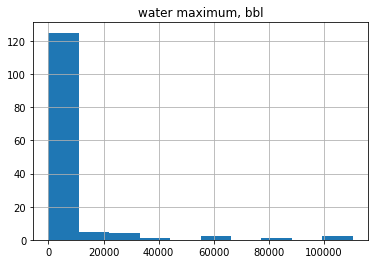

In [11]:
DV.hist(column='water maximum, bbl')

In [12]:
len(DV)

490

In [13]:
350/490


0.7142857142857143

array([[<AxesSubplot:title={'center':'oil maximum, bbl'}>]], dtype=object)

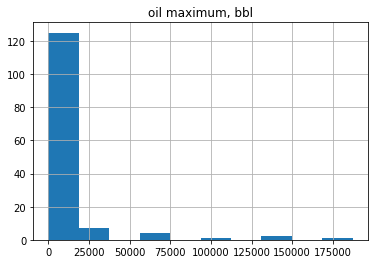

In [14]:
DV.hist(column='oil maximum, bbl')

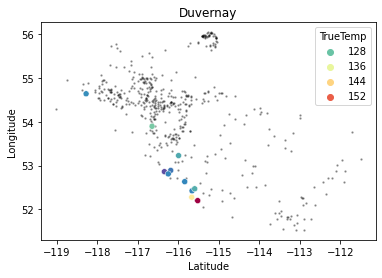

In [250]:
fig, ax = plt.subplots()
ax.scatter(DV['Surface_lon_NAD27'], DV['Surface_Lat_NAD27'],alpha=0.3, color='k', s=2)

DV2 = DV[DV['TrueTemp'] > 120]
#ax.scatter(DV2['Surface_Lat_NAD27'], DV2['Surface_lon_NAD27'], color='tab:red', s=20, alpha=0.5)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_title('Duvernay')
sns.scatterplot(data=DV2, x='Surface_lon_NAD27', y='Surface_Lat_NAD27', hue = 'TrueTemp',ax=ax, palette='Spectral_r')
# ax.invert_yaxis()
# ax.invert_xaxis()
#ax.set_aspect('equal')
fig.savefig('dv_sweet_spots.svg')

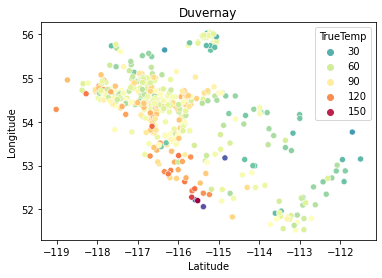

In [251]:
fig, ax = plt.subplots()
# ax.scatter(DV['Surface_lon_NAD27'], DV['Surface_Lat_NAD27'],alpha=0.3, color='k', s=2)

#DV2 = DV[DV['TrueTemp'] > 120]
#ax.scatter(DV2['Surface_Lat_NAD27'], DV2['Surface_lon_NAD27'], color='tab:red', s=20, alpha=0.5)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_title('Duvernay')
sns.scatterplot(data=DV, x='Surface_lon_NAD27', y='Surface_Lat_NAD27', hue = 'TrueTemp',ax=ax, palette='Spectral_r')
# ax.invert_yaxis()
# ax.invert_xaxis()
#ax.set_aspect('equal')
fig.savefig('dv_temps.svg')

In [16]:
DV['wc'] = DV['water total cum, bbl'] / (DV['water total cum, bbl'] + DV['oil total cum, bbl'])

In [17]:
DV[[]]

""
0
1
2
3
4
...
485
486
487
488


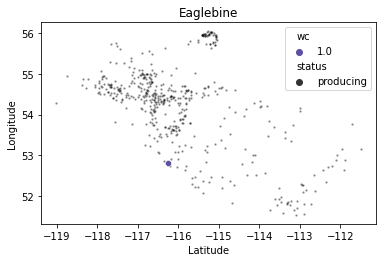

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(DV['Surface_lon_NAD27'], DV['Surface_Lat_NAD27'],alpha=0.3, color='k', s=2)

DV2 = DV[DV['TrueTemp'] > 120]
#ax.scatter(EB2['Surface_lon_NAD27'], EB2['Surface_Lat_NAD27'], color='tab:red', s=20, alpha=0.5)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_title('Eaglebine')
sns.scatterplot(data=DV2, x='Surface_lon_NAD27', y='Surface_Lat_NAD27', hue = 'wc', style='status', ax=ax, palette='Spectral_r')
ax.set_aspect('equal')
fig.savefig('dv_sweet_spots.svg')

In [19]:
DV.loc[DV['TrueTemp'] > 120, ['UWI', 'TrueTemp', 'source', 'label', 'oil total cum, bbl', 'gas total cum, mcf','water total cum, bbl',]]

,UWI,TrueTemp,source,label,"oil total cum, bbl","gas total cum, mcf","water total cum, bbl"
0,100010904012W500,123.758262,NaN,not assigned,NaN,NaN,NaN
1,100012404516W502,122.952385,NaN,test,NaN,NaN,NaN
15,100031204517W500,120.160407,NaN,not assigned,NaN,NaN,NaN
23,100042103812W500,141.737563,NaN,not assigned,NaN,NaN,NaN
56,100072504012W500,126.527321,NaN,not assigned,NaN,NaN,NaN
104,100111604914W500,126.151454,NaN,test,NaN,NaN,NaN
105,100112004213W500,124.049829,NaN,not assigned,NaN,NaN,NaN
129,100142103711W500,158.483678,NaN,not assigned,NaN,NaN,NaN
139,102112204416W500,123.920836,NaN,not assigned,0.0,3.364360e+08,1580411.194
401,100110505718W500,128.980000,synthetic,train,NaN,NaN,NaN


In [20]:
DV[DV['TrueTemp'] >120].to_csv('Duvernay selected wells.csv', index=False)

In [21]:
DV.source.unique()

array([nan, 'synthetic'], dtype=object)

# Eaglebine

In [22]:
EBp.columns

Index(['Unnamed: 0', 'UWI', 'BHT', 'TrueTemp', 'Field', 'TD (ft)', 'Avg_Gamma',
       'Mud Wt_0', 'Elevation_KB', 'Surface_Lat_NAD83', 'Surface_lon_NAD83',
       'Bottom_Lat_NAD83', 'Bottom_lon_NAD83', 'Surface_Lat_NAD27',
       'Surface_lon_NAD27', 'Bottom_Lat_NAD27', 'Bottom_lon_NAD27', 'Set',
       'Unnamed: 0.1', 'Unnamed: 0.1.1', 'SurfLat', 'SurfLong', 'TD, m',
       'GL, m', 'Depth subsea, m', 'Depth subsurface, m', 'BHT, C', 'TSC, h',
       'syn_diff_depth', 'Synthetic Temp, C', 'Static Temp, C',
       'static_diff_depth', 'True Temp, C_x', 'source', 'depth_diff',
       'abs_depth_diff', 'label', 'SLAT_WGS84', 'SLON_WGS84', 'DFT', 'DFD',
       'DFV', 'DFPH', 'DFL', 'RMS', 'MST', 'RMF', 'MFST', 'RMC', 'MCST', 'RMB',
       'TCS', 'TLAB', 'CS', 'BS', 'BSD', 'PHI', 'Vsh', 'CAL', 'mud_wt',
       'mud_wt@depth(KB), m', 'Syn Int Temp, C', 'True Temp, C_y',
       'True Temp_x, C', 'Temp_pred'],
      dtype='object')

In [23]:
eb_col_p = ['UWI',
 'BHT',
 'TrueTemp',
 'Field',
 'TD (ft)',
 'Surface_Lat_NAD27',
 'Surface_lon_NAD27',
 'Bottom_Lat_NAD27',
 'Bottom_lon_NAD27',
]

In [24]:
EBm.columns

Index(['UWI', 'SurfLat', 'SurfLong', 'TD, m_x', 'GL, m', 'Depth subsea, m',
       'Depth subsurface, m', 'TSC, h', 'BHT, C', 'Synthetic Temp, C',
       'Static Temp, C', 'True Temp, C', 'source', 'label',
       'SurfaceLatitude_NAD27', 'SurfaceLongitude_NAD27',
       'BottomLatitude_NAD27', 'BottomLongitude_NAD27', 'oil total cum, bbl',
       'gas total cum, mcf', 'water total cum, bbl', 'gor total average',
       'gas maximum, mcf', 'oil maximum, bbl', 'water maximum, bbl', 'status',
       'Mud Wt', 'TD, m_y', 'MW at Depth(KB), m', 'KB, m',
       'Min casing size, in', 'cumoil', 'cumgas', 'cumwater', 'GR', 'NPHI_SS',
       'NPHI_LS', 'DPHI_SS', 'DPHI_LS', 'PEFZ', 'RHOB', 'CAL'],
      dtype='object')

In [25]:
eb_col_misc = ['UWI',
    'oil total cum, bbl',
 'gas total cum, mcf',
 'water total cum, bbl',
 'gor total average',
 'gas maximum, mcf',
 'oil maximum, bbl',
 'water maximum, bbl',
 'status',
    'cumoil',
 'cumgas',
 'cumwater'
]

eb_col_m = ['UWI',
     'TD, m_x',
 'GL, m',
 'Depth subsea, m',
 'Depth subsurface, m',
     'BHT, C',
 'Synthetic Temp, C',
 'Static Temp, C',
 'True Temp, C',
 'source',
 'label',
]

EB = EBp[eb_col_p].merge(EBm[eb_col_m], on='UWI', how='left')

EB = EB.merge(EBmisc[eb_col_misc], on='UWI', how='left')

In [26]:
EB.isnull().sum()

UWI                       0
BHT                       0
TrueTemp                  0
Field                     0
TD (ft)                   0
Surface_Lat_NAD27         0
Surface_lon_NAD27         0
Bottom_Lat_NAD27          0
Bottom_lon_NAD27          0
TD, m_x                   0
GL, m                     0
Depth subsea, m           0
Depth subsurface, m       0
BHT, C                    0
Synthetic Temp, C        81
Static Temp, C          305
True Temp, C             81
source                   81
label                     0
oil total cum, bbl       78
gas total cum, mcf       78
water total cum, bbl     78
gor total average        86
gas maximum, mcf         78
oil maximum, bbl         78
water maximum, bbl       78
status                   16
cumoil                   74
cumgas                   74
cumwater                 74
dtype: int64

In [27]:
EB['wc'] = EB['water total cum, bbl'] / (EB['water total cum, bbl'] + EB['oil total cum, bbl'])

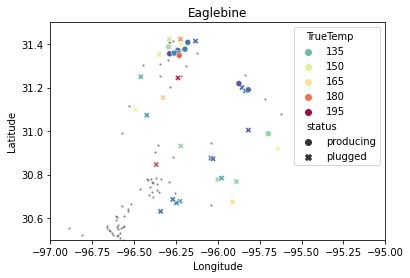

In [266]:
fig, ax = plt.subplots()
ax.scatter(EB['Surface_lon_NAD27'], EB['Surface_Lat_NAD27'],alpha=0.3, color='k', s=2)

EB2 = EB[EB['TrueTemp'] > 120]
#ax.scatter(EB2['Surface_lon_NAD27'], EB2['Surface_Lat_NAD27'], color='tab:red', s=20, alpha=0.5)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title('Eaglebine')
sns.scatterplot(data=EB2, x='Surface_lon_NAD27', y='Surface_Lat_NAD27', hue = 'TrueTemp', style='status', ax=ax, palette='Spectral_r')
#ax.reverse_xaxis()
ax.set_xlim((-97, -95))
ax.set_ylim((30.5, 31.5))

fig.savefig('eb_sweet_spots.svg')


In [252]:
fig, ax = plt.subplots(figsize=(6,6))
# ax.scatter(EB['Surface_lon_NAD27'], EB['Surface_Lat_NAD27'],alpha=0.3, color='k', s=2)

EB2 = EB[EB['TrueTemp'] > 120]
#ax.scatter(EB2['Surface_lon_NAD27'], EB2['Surface_Lat_NAD27'], color='tab:red', s=20, alpha=0.5)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title('Eaglebine')
sns.scatterplot(data=EB, x='Surface_lon_NAD27', y='Surface_Lat_NAD27', hue = 'TrueTemp', style='status', ax=ax, palette='Spectral_r')
#ax.reverse_xaxis()
# ax.set_aspect('equal')
fig.savefig('eb_temps.svg')fig, ax = plt.subplots()
ax.scatter(DV['Surface_lon_NAD27'], DV['Surface_Lat_NAD27'],alpha=0.3, color='k', s=2)


SyntaxError: invalid syntax (<ipython-input-252-2dfffd086466>, line 12)

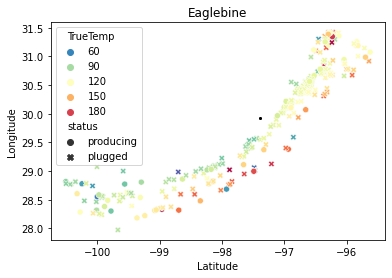

In [258]:
fig, ax = plt.subplots()
ax.scatter(EB['Surface_lon_NAD27'], EB['Surface_Lat_NAD27'],alpha=0.3, color='k', s=2)

EB2 = EB[EB['TrueTemp'] > 120]
#ax.scatter(EB2['Surface_lon_NAD27'], EB2['Surface_Lat_NAD27'], color='tab:red', s=20, alpha=0.5)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_title('Eaglebine')
sns.scatterplot(data=EB, x='Surface_lon_NAD27', y='Surface_Lat_NAD27', hue = 'TrueTemp',ax=ax, palette='Spectral_r', style='status')
# ax.set_aspect('equal')
fig.savefig('eb_temps.svg')


In [30]:
EB['water maximum, bbl'].isnull().sum()

78

array([[<AxesSubplot:title={'center':'water maximum, bbl'}>]],
      dtype=object)

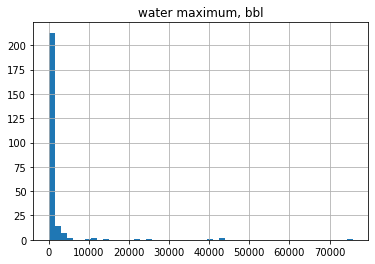

In [31]:
EB.hist(column='water maximum, bbl', bins =50)

In [32]:
EB.isnull().sum()

UWI                       0
BHT                       0
TrueTemp                  0
Field                     0
TD (ft)                   0
Surface_Lat_NAD27         0
Surface_lon_NAD27         0
Bottom_Lat_NAD27          0
Bottom_lon_NAD27          0
TD, m_x                   0
GL, m                     0
Depth subsea, m           0
Depth subsurface, m       0
BHT, C                    0
Synthetic Temp, C        81
Static Temp, C          305
True Temp, C             81
source                   81
label                     0
oil total cum, bbl       78
gas total cum, mcf       78
water total cum, bbl     78
gor total average        86
gas maximum, mcf         78
oil maximum, bbl         78
water maximum, bbl       78
status                   16
cumoil                   74
cumgas                   74
cumwater                 74
wc                       82
dtype: int64

In [33]:
EB['wc'] = EB['oil total cum, bbl'] / EB['water total cum, bbl']

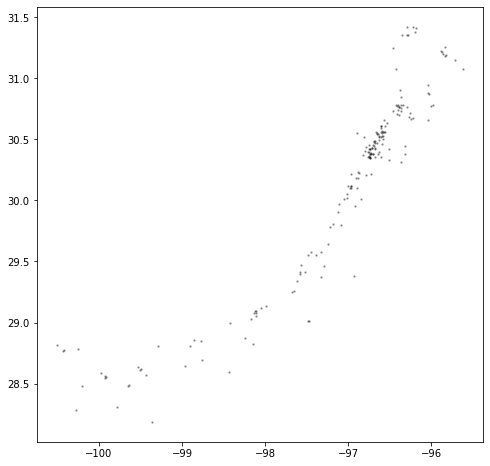

In [34]:
fig, ax = plt.subplots(figsize=(8,8))

EB2 = EB[EB['wc']>0.5]
ax.scatter(EB2['Surface_lon_NAD27'], EB2['Surface_Lat_NAD27'],alpha=0.3, color='k', s=2)


In [35]:
DV

,UWI,TrueTemp,Surface_Lat_NAD27,Surface_lon_NAD27,Bottom_Lat_NAD27,Bottom_lon_NAD27,Formation,"Synthetic Temp, C","Static Temp, C","True Temp, C",...,label,"oil total cum, bbl","gas total cum, mcf","water total cum, bbl",gor total average,"gas maximum, mcf","oil maximum, bbl","water maximum, bbl",status,wc
0,100010904012W500,123.758262,52.424180,-115.657433,52.424180,-115.657433,Melkton,NaN,NaN,NaN,...,not assigned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,producing,NaN
1,100012404516W502,122.952385,52.889725,-116.183134,52.889725,-116.183134,Melkton,NaN,NaN,NaN,...,test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,producing,NaN
2,100012805703W500,52.117941,53.951223,-114.379260,53.951223,-114.379260,Kmannvl_L,NaN,NaN,NaN,...,test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,producing,NaN
3,100013603712W500,13.146140,52.216665,-115.579316,52.217223,-115.578140,Clynx,NaN,NaN,NaN,...,not assigned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,producing,NaN
4,100020206419W500,88.649752,54.503527,-116.758284,54.503527,-116.758284,Dwintrbrn,NaN,NaN,NaN,...,test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,producing,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,102061003805W500,73.640000,52.252880,-114.633346,52.252880,-114.633346,K2nd_ws,73.64,NaN,73.64,...,train,3590.225,67616.993,6.919,18833.637,15541.985,838.432,6.919,producing,0.001923
486,102061504515W400,42.790000,52.877383,-112.097822,52.877383,-112.097822,Kellrslie,42.79,NaN,42.79,...,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,producing,NaN
487,102071804513W400,41.650000,52.879058,-111.876113,52.879058,-111.876113,Dwintrbrn,41.65,NaN,41.65,...,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,producing,NaN
488,102142004709W500,81.480000,53.072353,-115.285653,53.072353,-115.285653,Jrock_ck,81.48,NaN,81.48,...,train,12509.182,1448936.066,1160.481,115829.801,19818.591,210.709,191.839,producing,0.084895


In [36]:
EB['TD (ft)'].max()

24037.0

In [37]:
len(EB)

324

In [38]:
EB[['UWI', 'TrueTemp']].to_csv('Eaglebine temperatures.csv')

In [39]:
DV[['UWI', 'TrueTemp']].to_csv('Duvernay temperatures.csv')

In [40]:
DV.columns

Index(['UWI', 'TrueTemp', 'Surface_Lat_NAD27', 'Surface_lon_NAD27',
       'Bottom_Lat_NAD27', 'Bottom_lon_NAD27', 'Formation',
       'Synthetic Temp, C', 'Static Temp, C', 'True Temp, C', 'source',
       'label', 'oil total cum, bbl', 'gas total cum, mcf',
       'water total cum, bbl', 'gor total average', 'gas maximum, mcf',
       'oil maximum, bbl', 'water maximum, bbl', 'status', 'wc'],
      dtype='object')

# Temperature Profile

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, MaxAbsScaler,
                                   RobustScaler, PolynomialFeatures)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingRegressor

In [71]:
def linear_model(X, y):
    scalers = [MaxAbsScaler(), RobustScaler(), MinMaxScaler(), StandardScaler()]

    pipe = Pipeline([
        ('scaler', MaxAbsScaler()),
        ('pca', PCA()),
        ('poly', PolynomialFeatures()),
        ('bag', BaggingRegressor(base_estimator=LinearRegression(), 
                                    n_estimators=100, n_jobs=-1, random_state=7)),
    ])

    params = {
        'scaler': scalers,
        #'pca__n_components': [3],
        'poly__degree': [1, 2],
        'bag__max_samples': [0.75, 1.0],
        'bag__max_features': [1.0],
        'bag__bootstrap': [True, False],
        'bag__n_estimators': [100, 150, 250],
        'bag__base_estimator':  [LinearRegression()]
    }

    gcv = GridSearchCV(pipe, params, cv=KFold(random_state=5, shuffle=True))

    gcv.fit(X, y)

    return gcv

In [72]:
DV.isnull().sum()

UWI                       0
TrueTemp                  0
Surface_Lat_NAD27         0
Surface_lon_NAD27         0
Bottom_Lat_NAD27          0
Bottom_lon_NAD27          0
Depth subsea, m           0
BHT, C                    0
Formation                 0
Synthetic Temp, C       140
Static Temp, C          490
True Temp, C            140
source                  140
label                     0
oil total cum, bbl      350
gas total cum, mcf      350
water total cum, bbl    350
gor total average       363
gas maximum, mcf        350
oil maximum, bbl        350
water maximum, bbl      350
status                    0
dtype: int64

In [84]:
dv_features = [
    'Depth subsea, m',
    'Surface_Lat_NAD27',
    'Surface_lon_NAD27',
]

DV_Xtrain = DV[dv_features]
DV_ytrain = DV['TrueTemp']

In [85]:
DV_model = linear_model(DV_Xtrain, DV_ytrain)

In [225]:
def visualize_model(model,xfeature,yfeature, zfeature, response,title,):# plots the data points and the decision tree prediction 
    fig, ax = plt.subplots()
    n_classes = 10
    
    cmap = plt.cm.CMRmap_r
    plot_step = 0.02
    x_min, x_max = np.min(xfeature) *1, np.max(xfeature) * 1
    y_min, y_max = np.min(yfeature) *1, np.max(yfeature) * 1
    resp_min = np.round(min(response)); resp_max = np.round(max(response));
  
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    depth = zfeature * np.ones(10000)
    
#     z_min = np.round(min(response)); z_max = np.round(max(response))
    
    Z = model.predict(np.c_[depth, xx.ravel(), yy.ravel()])
    #z_min = np.round(min(Z)); z_max = np.round(max(Z))
    z_min = 50
    z_max = 120
    Z = Z.reshape(yy.shape)
    
    
    cs = ax.contourf(xx, yy, Z, cmap=cmap,vmin=z_min, vmax=z_max, levels=20)

    im = ax.scatter(xfeature,yfeature,s=None, marker=".", color='k',
    cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.5, linewidths=0.3, edgecolors="black")
    
    ax.set_title(title)
    ax.set_xlabel("Latitude")
    ax.set_ylabel("Longitude")
    ax.set_aspect("equal")
    cbar = plt.colorbar(cs, orientation = 'vertical')
    cbar.set_label(response.name, rotation=270, labelpad=20)
    ax.invert_xaxis()
#     ax.invert_yaxis()
    return(plt)

<module 'matplotlib.pyplot' from 'c:\\users\\rico\\documents\\github\\gtx-2021\\gtx_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

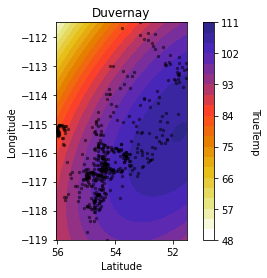

In [226]:
visualize_model(DV_model, DV[dv_features[1]], DV[dv_features[2]], 2000, DV['TrueTemp'], 'Duvernay')

In [227]:
EB.columns

Index(['UWI', 'BHT', 'TrueTemp', 'Field', 'TD (ft)', 'Surface_Lat_NAD27',
       'Surface_lon_NAD27', 'Bottom_Lat_NAD27', 'Bottom_lon_NAD27', 'TD, m_x',
       'GL, m', 'Depth subsea, m', 'Depth subsurface, m', 'BHT, C',
       'Synthetic Temp, C', 'Static Temp, C', 'True Temp, C', 'source',
       'label', 'oil total cum, bbl', 'gas total cum, mcf',
       'water total cum, bbl', 'gor total average', 'gas maximum, mcf',
       'oil maximum, bbl', 'water maximum, bbl', 'status', 'cumoil', 'cumgas',
       'cumwater', 'wc'],
      dtype='object')

In [228]:
eb_features = [
    'Depth subsea, m',
    'Surface_Lat_NAD27',
    'Surface_lon_NAD27',
]

eb_Xtrain = EB[eb_features]
eb_ytrain = EB['TrueTemp']
EB_model = linear_model(eb_Xtrain, eb_ytrain)

<module 'matplotlib.pyplot' from 'c:\\users\\rico\\documents\\github\\gtx-2021\\gtx_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

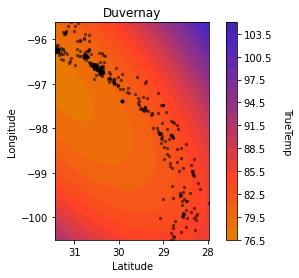

In [229]:
visualize_model(EB_model, EB[eb_features[1]], EB[eb_features[2]], 1500, EB['TrueTemp'], 'Duvernay')

In [224]:
EB['Depth subsea, m'].max()

5831.433413394131

In [173]:
EB['Depth subsea, m'].min()

561.7463820241157